Reading a GIS vector file begins by opening it in mode `'r'` using Fiona’s `open()` function. It returns an opened `Collection` object.

We will use the map of census blocks of New York City available for download from the [New York Department of City Planning](http://www.nyc.gov/html/dcp/html/bytes/dwndistricts.shtml#cbt).

In [1]:
import os
import fiona
datadir = os.path.join(os.path.abspath('../..'), 'data', 'nybb_13a')
shpfile = os.path.join(datadir, 'nybb.shp')
c = fiona.open(shpfile, 'r')
c

IOError: no such file or directory: '/Users/kjordahl/scipy2015/data/nybb_13a/nybb.shp'

In [8]:
len(c)

5

A `Collection` has a read-only driver attribute which names the OGR format driver used to open the vector file.

In [9]:
c.driver

'ESRI Shapefile'

The coordinate reference system (CRS) of the collection’s vector data is accessed via a read-only crs attribute, represented by a mapping of PROJ.4 parameters.

In [10]:
c.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

The fiona.crs module provides 3 functions to assist with these mappings.

In [11]:
from fiona.crs import to_string, from_string, from_epsg

`to_string()` converts mappings to PROJ.4 strings:

In [12]:
print to_string(c.crs)

+datum=NAD83 +lat_0=40.1666666667 +lat_1=40.6666666667 +lat_2=41.0333333333 +lon_0=-74 +no_defs +proj=lcc +units=us-ft +x_0=300000 +y_0


`from_string()` does the inverse.

In [13]:
from_string("+datum=WGS84 +ellps=WGS84 +no_defs +proj=longlat")

{'datum': 'WGS84', 'ellps': 'WGS84', 'no_defs': True, 'proj': 'longlat'}

`from_epsg()` is a shortcut to CRS mappings from EPSG codes.

In [14]:
from_epsg(3857)

{'init': 'epsg:3857', 'no_defs': True}

Fiona’s `Collection` is like a Python file, but is iterable for records rather than lines.

In [15]:
rec = c.next()

A record you get from a collection is a Python dict structured exactly like a GeoJSON Feature. Fiona records are self-describing; the names of its fields are contained within the data structure and the values in the fields are typed properly for the type of record. Numeric field values are instances of type int and float, for example, not strings.

In [16]:
rec.keys()

['geometry', 'id', 'properties']

A record has a `properties` key. Its corresponding value is a mapping. The keys of the properties mapping are the same as the keys of the properties mapping in the schema of its collection.

In [17]:
rec['properties']

{'BoroCode': 5,
 'BoroName': u'Staten Island',
 'Shape_Area': 1623853249.91,
 'Shape_Leng': 330385.036974}

A record has a geometry key. Its corresponding value is a mapping with type and coordinates keys. Since the coordinates are just tuples, or lists of tuples, or lists of lists of tuples, the type tells you how to interpret them.

In [18]:
rec['geometry'].keys()

['type', 'coordinates']

In [19]:
rec['geometry']['type']

'MultiPolygon'

(47, 2)
(9, 2)
(58, 2)
(8910, 2)


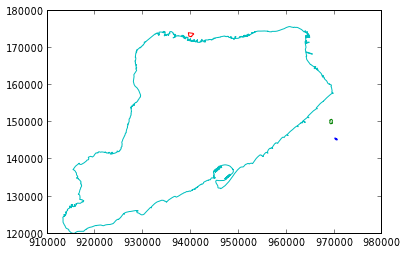

In [20]:
import numpy as np
from matplotlib.pyplot import plot

for poly in rec['geometry']['coordinates']:
    coords = array(poly).squeeze()
    print coords.shape
    plot(coords[:,0], coords[:,1])

### Filtering

With some vector data formats a spatial index accompanies the data file, allowing efficient bounding box searches. A collection’s `filter()` method returns an iterator over records that intersect a given `(minx, miny, maxx, maxy)` bounding box. The collection’s own coordinate reference system (see below) is used to interpret the box’s values.

In [21]:
c = fiona.open(shpfile, 'r')
hits = c.filter(bbox=(972000, 194000, 975000, 197000))
len(list(hits))

1